In [2]:
# import libs
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

Using TensorFlow backend.


In [3]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


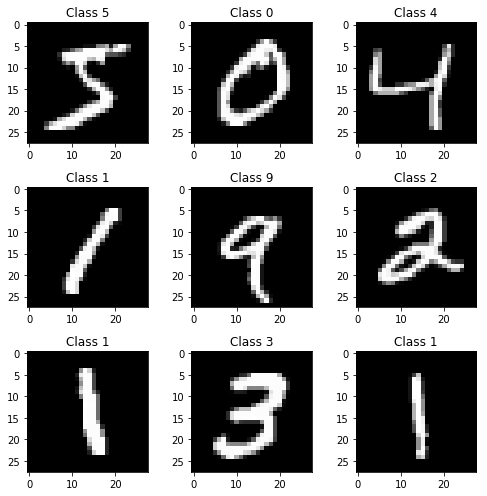

In [17]:
# visualize data
plt.rcParams['figure.figsize'] = (7, 7)
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap = 'gray')
    plt.title('Class {}'.format(y_train[i]))
plt.tight_layout()

In [18]:
# preprocessing data
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
x_train = x_train.astype('float')
x_test = x_test.astype('float')
x_train /= 255
x_test /= 255
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [19]:
# convert label to one-hot vector
classes = np.max(y_train) + 1
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)
print(y_train.shape)
print(y_test.shape)
print(y_train[0])

(60000, 10)
(10000, 10)
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
None


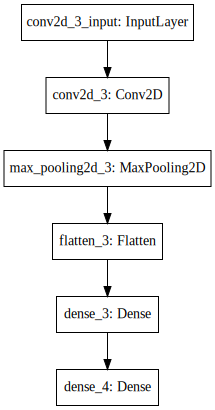

In [20]:
# build model
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
# classifier
model.add(Dense(units = classes, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

print(model.summary())
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog = 'dot', format = 'svg'))

In [21]:
# train model
batch_size = 32
epochs = 2
model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1)

Epoch 1/2
60000/60000 [==============================] - 41s 678us/step - loss: 0.1491 - acc: 0.9554
Epoch 2/2
60000/60000 [==============================] - 41s 675us/step - loss: 0.0493 - acc: 0.9850


In [22]:
# evaluate model
score = model.evaluate(x_test, y_test, verbose = 0)
print('accuracy = {}'.format(score[1]))

accuracy = 0.9849


correct: 9849
incorrect: 151


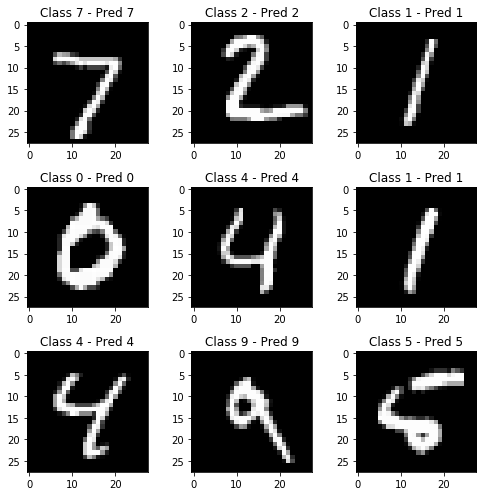

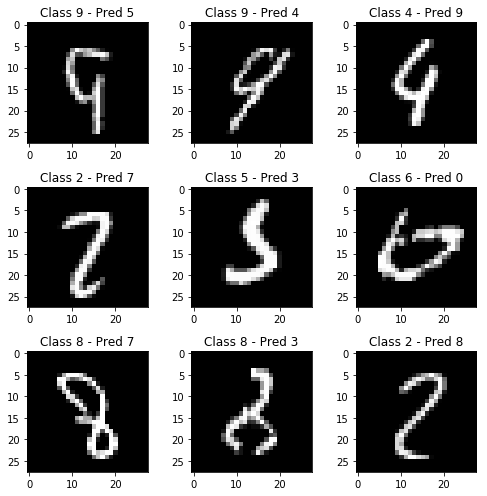

In [23]:
# test model
preds = model.predict(x_test)
correct, incorrect = [], []
for i in range(len(y_test)):
    if np.argmax(preds[i]) == np.argmax(y_test[i]):
        correct.append(i)
    else:
        incorrect.append(i)
print('correct: {}'.format(len(correct)))
print('incorrect: {}'.format(len(incorrect)))

# visualize result
plt.figure()
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[correct[i]].reshape(28, 28), cmap = 'gray')
    plt.title('Class {} - Pred {}'.format(np.argmax(y_test[correct[i]]), np.argmax(preds[correct[i]])))
plt.tight_layout()

plt.figure()
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[incorrect[i]].reshape(28, 28), cmap = 'gray')
    plt.title('Class {} - Pred {}'.format(np.argmax(y_test[incorrect[i]]), np.argmax(preds[incorrect[i]])))
plt.tight_layout()